### Try It: Comparing Feature Selection Methods

In this module, you have seen two ways to select features.  The first approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model.  The second approach is using a regularized model to identify features based on non-zero coefficients.  This activity focuses on comparing variations of both these methods.  

You will use both the `SequentialFeatureSelection` and `RFE` (recursive feature elimination) to build and compare regression models.  Consider the following 6 feature selection methods -- leave all other arguments to default besides the `estimator` and `n_features_to_select` arguments:

- `Ridge` regressor to extract coefficients
- `SequentialFeatureSelection` using the `Lasso` to select 4 features.
- `RFE` using `Lasso` to select 4 features.

For each of these, fit the training data `X_train`, `y_train` below.  Compare the magnitude of the results of your `Ridge` model to those that result from feature selection methods.  

#### The Data

For this problem a dataset with information on red wine chemical compositions and their quality is given.  Your goal is to use the properties of the wine to predict the quality.  Below, the data is loaded and train/test splits constructed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.figure_factory import create_table
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data/winequality-red.csv', sep = ',')

In [3]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
X = df.drop('quality', axis = 1)
y = df['quality']

<Axes: >

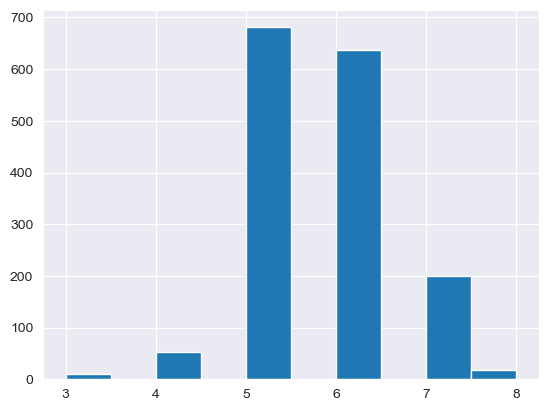

In [5]:
y.hist()

In [6]:
from sklearn.preprocessing import quantile_transform
y_trans = quantile_transform(y.to_frame(), n_quantiles=900, output_distribution="normal", copy=True).squeeze()

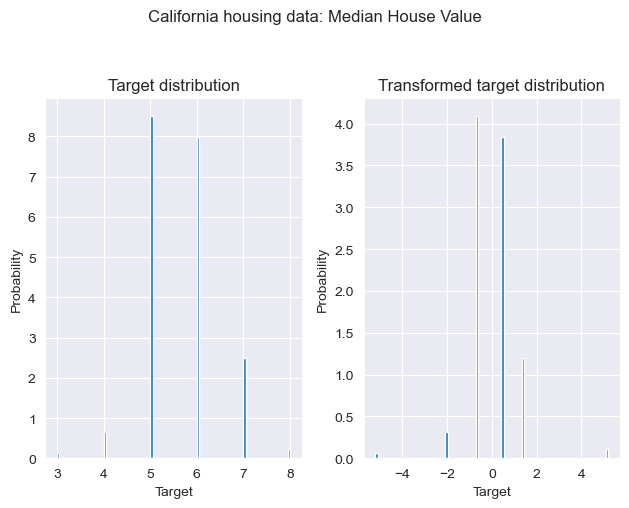

In [7]:
f, (ax0, ax1) = plt.subplots(1, 2)

ax0.hist(y, bins=100, density=True)
ax0.set_ylabel("Probability")
ax0.set_xlabel("Target")
ax0.set_title("Target distribution")

ax1.hist(y_trans, bins=100, density=True)
ax1.set_ylabel("Probability")
ax1.set_xlabel("Target")
ax1.set_title("Transformed target distribution")

f.suptitle("California housing data: Median House Value", y=1.05)
plt.tight_layout()

<Axes: >

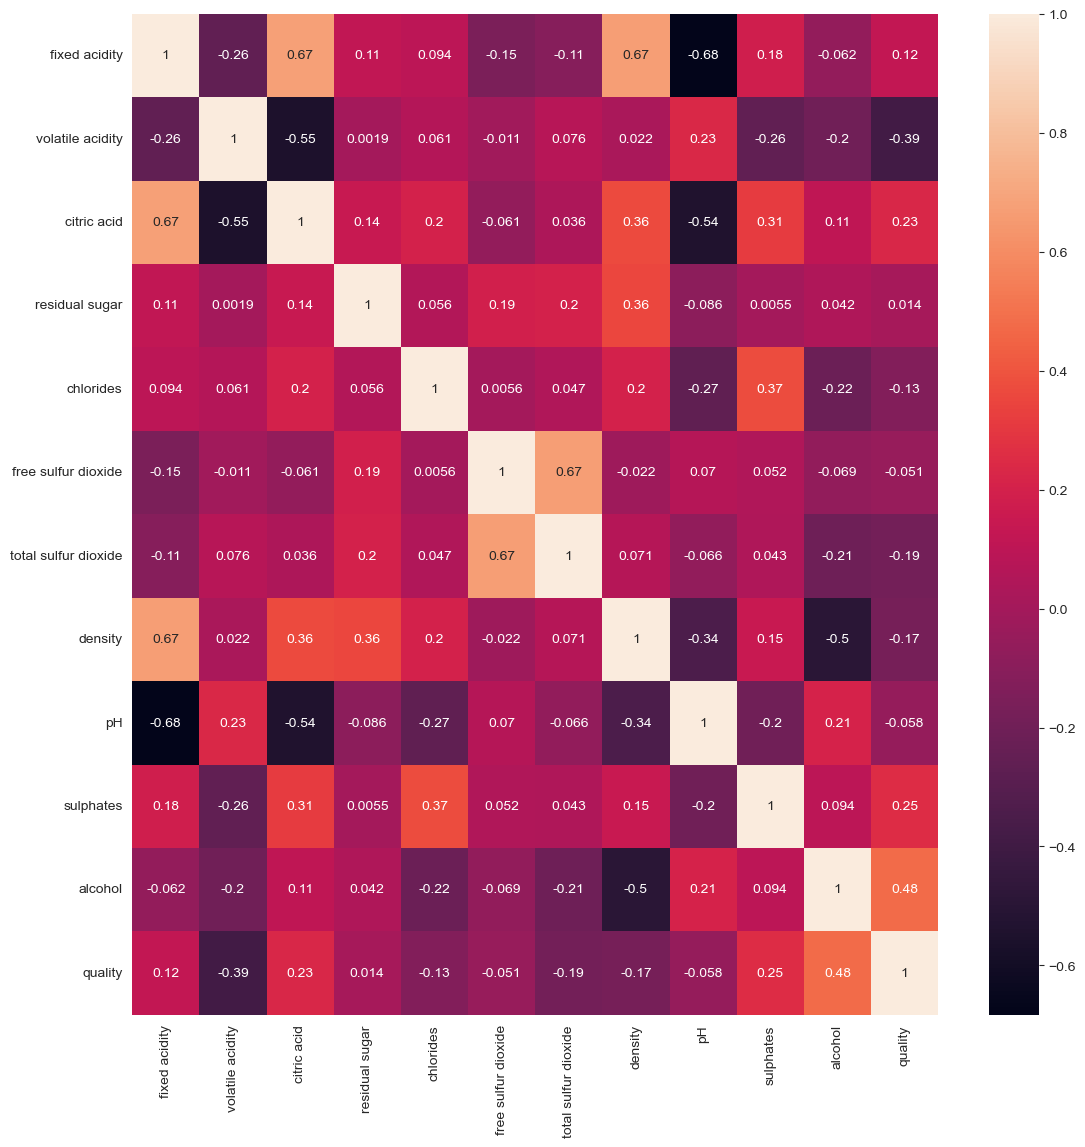

In [8]:
#Exploration
plt.figure(figsize = (13, 13))
sns.heatmap(df.corr(), annot = True)

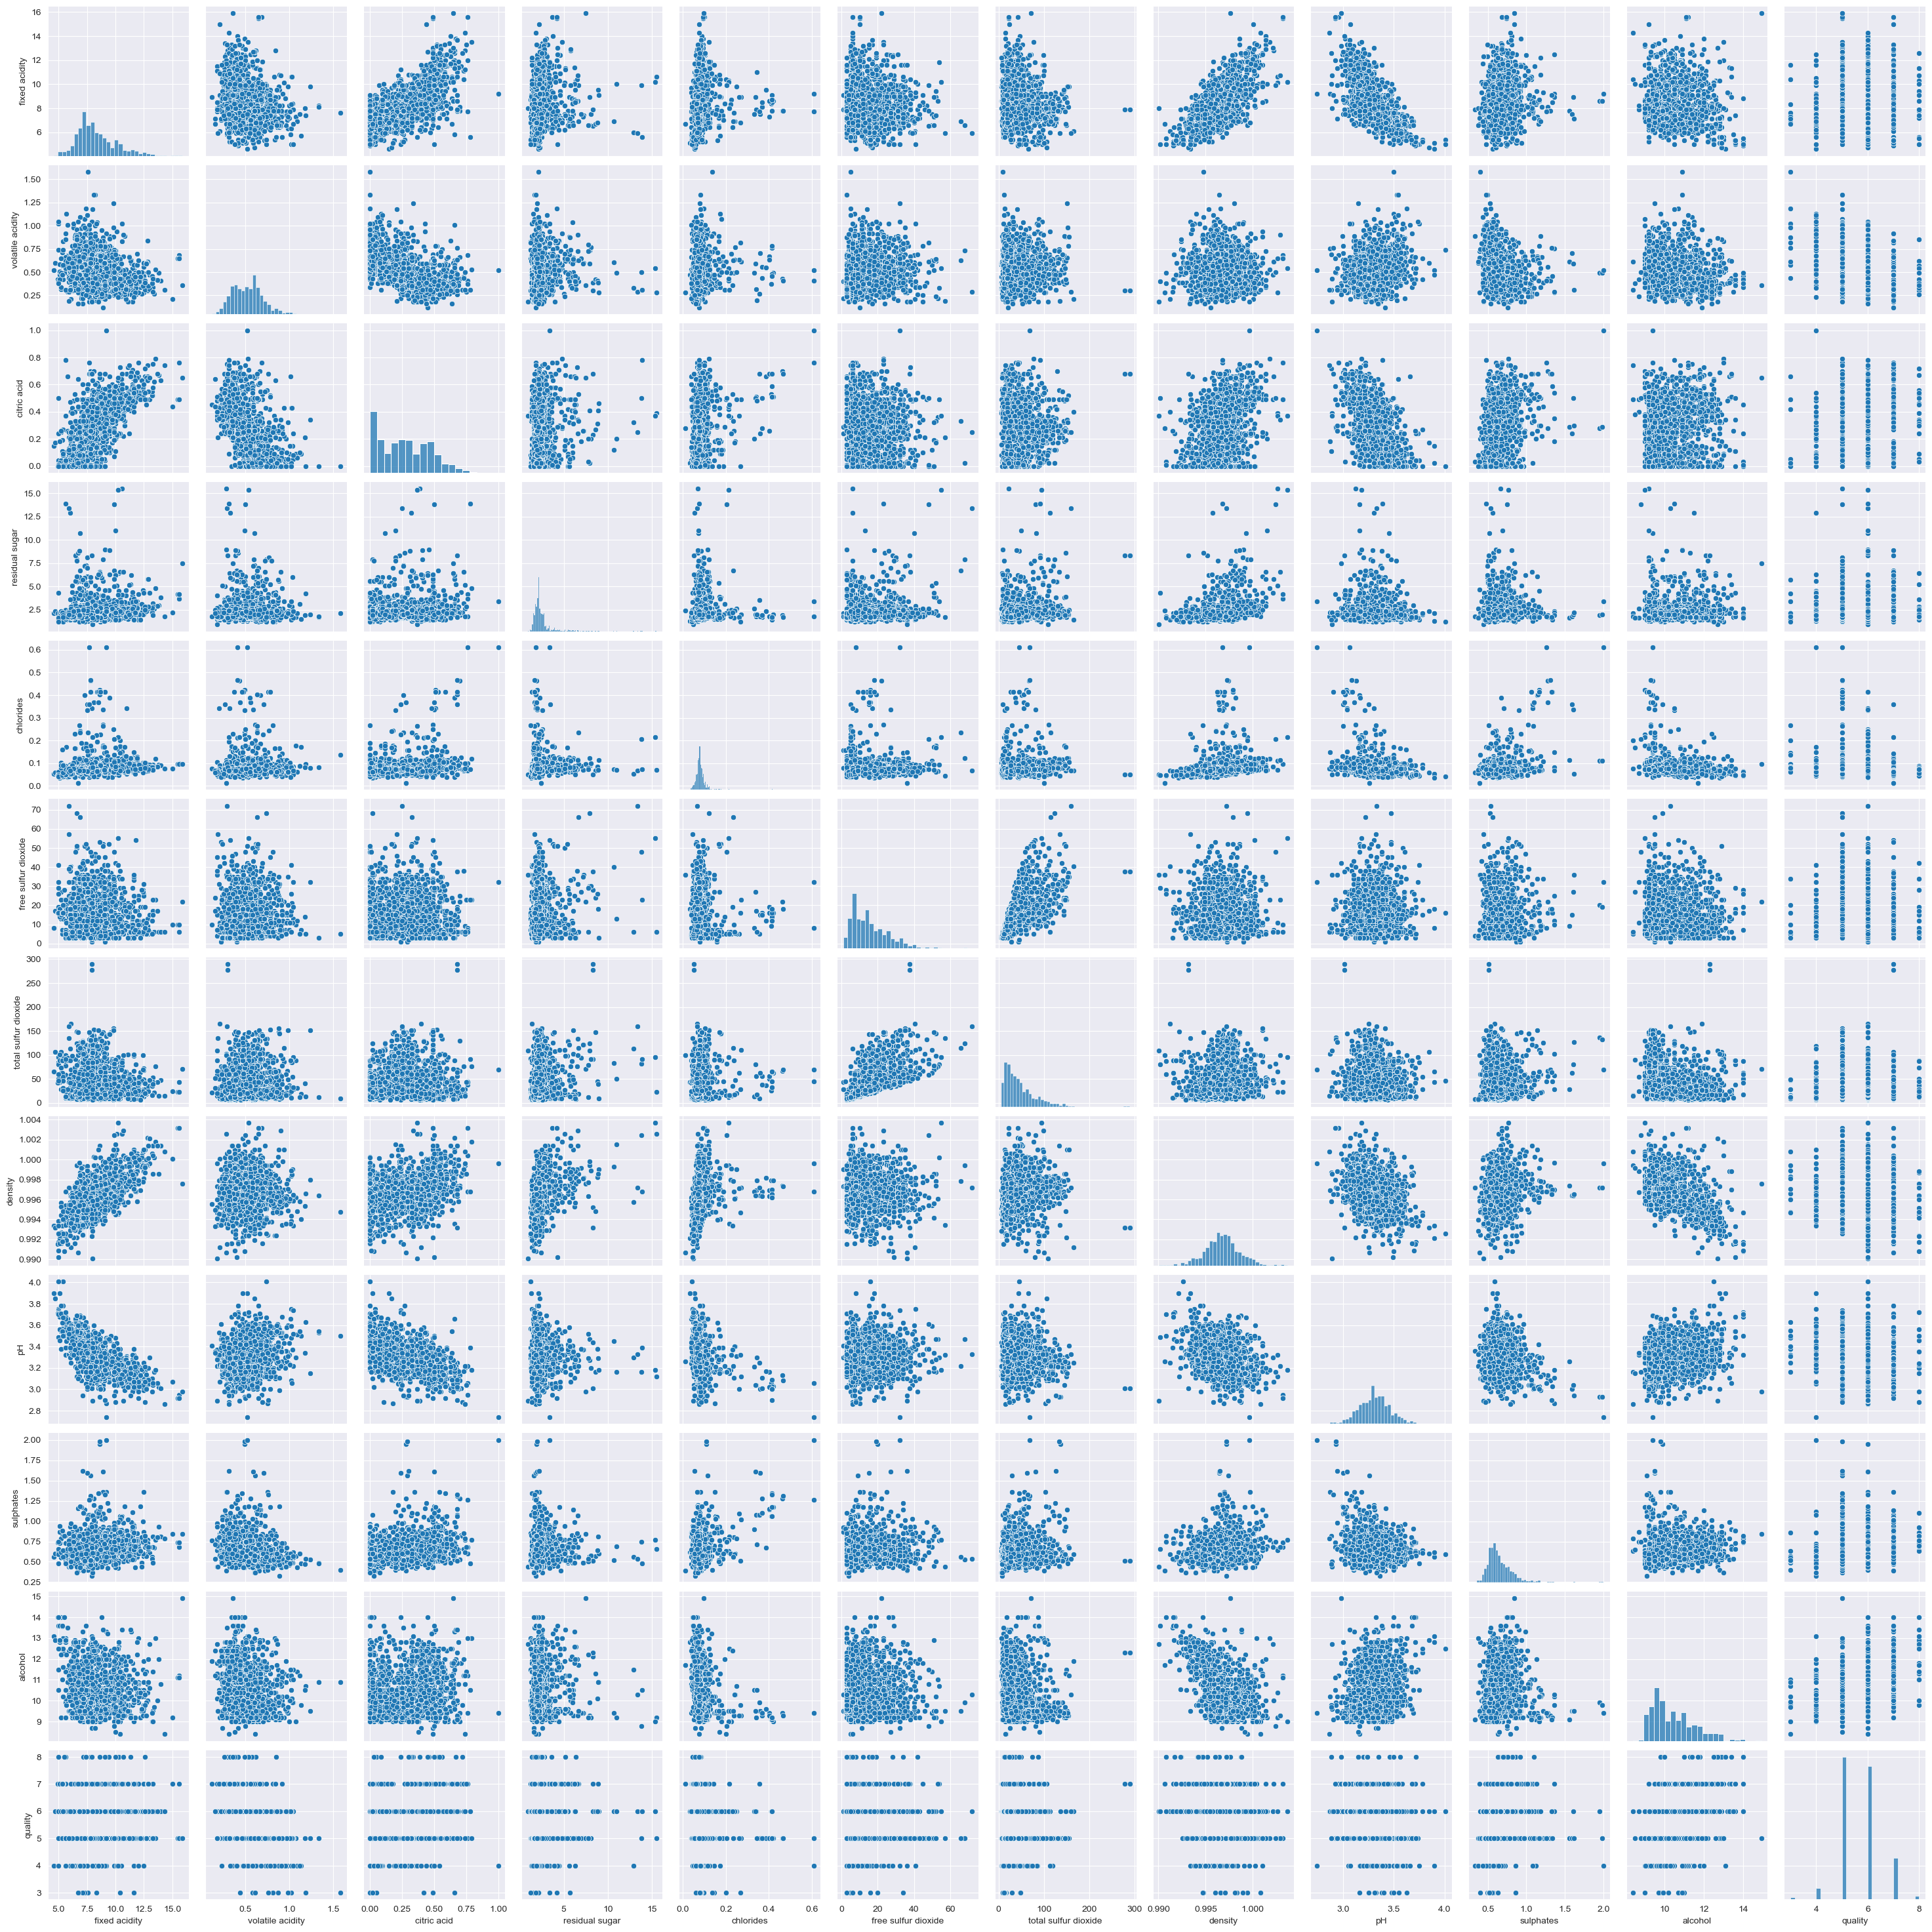

In [9]:
sns.pairplot(df)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector, RFE

### Linear Regression

In [12]:
lnr = LinearRegression()
lnr.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred_lrg = lnr.predict(X_test)

# The coefficients
#print('Coefficients: \n', np.round(ridge.coef_, 2) )
print()
# Evaluate the model on the test set with the selected features
print(f"Model Train Linear score with selected features: {lnr.score(X_train, y_train,):.3f}")
print(f"Model Linear score with selected features: {lnr.score(X_test, y_test,):.3f}")
print(f"Model R2 with selected features score: {r2_score(y_test, y_pred_lrg,):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred_lrg):.4f}")
list(zip(X_train.columns, np.round(lnr.coef_, 2)))


Model Train Linear score with selected features: 0.356
Model Linear score with selected features: 0.359
Model R2 with selected features score: 0.359
MSE: 0.4242


[('fixed acidity', 0.02),
 ('volatile acidity', -1.05),
 ('citric acid', -0.21),
 ('residual sugar', 0.02),
 ('chlorides', -1.72),
 ('free sulfur dioxide', 0.0),
 ('total sulfur dioxide', -0.0),
 ('density', -20.72),
 ('pH', -0.33),
 ('sulphates', 0.79),
 ('alcohol', 0.29)]

### Ridge Regression
- `Ridge` regressor to extract coefficients

In [14]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [15]:
y_pred_ridge = ridge.predict(X_test)

# The coefficients
#print('Coefficients: \n', np.round(ridge.coef_, 2) )
print()
# Evaluate the model on the test set with the selected features
print(f"Model Train Ridge score with selected features:: {ridge.score(X_train, y_train,):.3f}")
print(f"Model Ridge score with selected features: {ridge.score(X_test, y_test,):.3f}")
print(f"Model R2: {r2_score(y_test, y_pred_ridge,):.3f}")
print('For alpha = 1 we have the following coefficients:')
print(f"MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
coeff_lrg = pd.DataFrame(X_train.columns)
coeff_lrg['Coefficient Estimate'] = pd.Series(lnr.coef_)
coeff_lrg.sort_values(by=['Coefficient Estimate'],  inplace=True)
coeff_lrg.rename(columns={0:'features'}, inplace=True)
coeff_lrg


Model Train Ridge score with selected features:: 0.355
Model Ridge score with selected features: 0.356
Model R2: 0.356
For alpha = 1 we have the following coefficients:
MSE: 0.4266


features  Coefficient Estimate
7                density            -20.724157
4              chlorides             -1.717274
1       volatile acidity             -1.048793
8                     pH             -0.326749
2            citric acid             -0.205059
6   total sulfur dioxide             -0.003005
5    free sulfur dioxide              0.003145
3         residual sugar              0.018428
0          fixed acidity              0.019148
10               alcohol              0.288943
9              sulphates              0.789183

In [16]:
alphas = [0.001, 1.0, 10.0, 100.0]
coef_list = []
r2_list=[]
mse_list = []
scores_rig_train = []
scores_rig = []
for alpha in alphas:
    ridge1 = Ridge(alpha = alpha)
    ridge1.fit(X_train, y_train)
    coef_list.append(list(np.round(ridge1.coef_, 2)))
    scores_rig_train.append(ridge1.score(X_train, y_train,))
    scores_rig.append(ridge1.score(X_test, y_test,))
    r2_list.append(r2_score(y_test, ridge1.predict(X_test)))
    mse_list.append(mean_squared_error(y_test, ridge1.predict(X_test)))

In [17]:
ridge100 = Ridge(alpha = 100)
ridge100.fit(X_train, y_train)

Ridge(alpha=100)

In [18]:
len(coef_list)
# Evaluate the model on the test set with the selected features
#print(f"Model score with selected features: {lasso.score(X_test_selected, y_test):.3f}")
print(f"Model Ridge with alfa =100 ")
print(f"Model Train Ridge score with selected features:: {scores_rig_train[-1]:.3f}")
print(f"Model Ridge score with selected features: {scores_rig[-1]:.3f}")
print(f"Model R2: {r2_list[-1]:.3f}")
print(f"MSE: {mse_list[-1]:.4f}")
coeff_lrg100 = pd.DataFrame(X_train.columns)
coeff_lrg100['Coefficient Estimate'] = pd.Series(coef_list[-1])
coeff_lrg100.sort_values(by=['Coefficient Estimate'],  inplace=True)
coeff_lrg100.rename(columns={0:'features'}, inplace=True)
coeff_lrg100

Model Ridge with alfa =100 
Model Train Ridge score with selected features:: 0.306
Model Ridge score with selected features: 0.280
Model R2: 0.280
MSE: 0.4771


features  Coefficient Estimate
1       volatile acidity                 -0.26
8                     pH                 -0.05
4              chlorides                 -0.03
3         residual sugar                 -0.00
6   total sulfur dioxide                 -0.00
7                density                 -0.00
5    free sulfur dioxide                  0.01
0          fixed acidity                  0.03
2            citric acid                  0.08
9              sulphates                  0.17
10               alcohol                  0.32

Text(0.5, 1.0, 'Ridge Model with alfa=100')

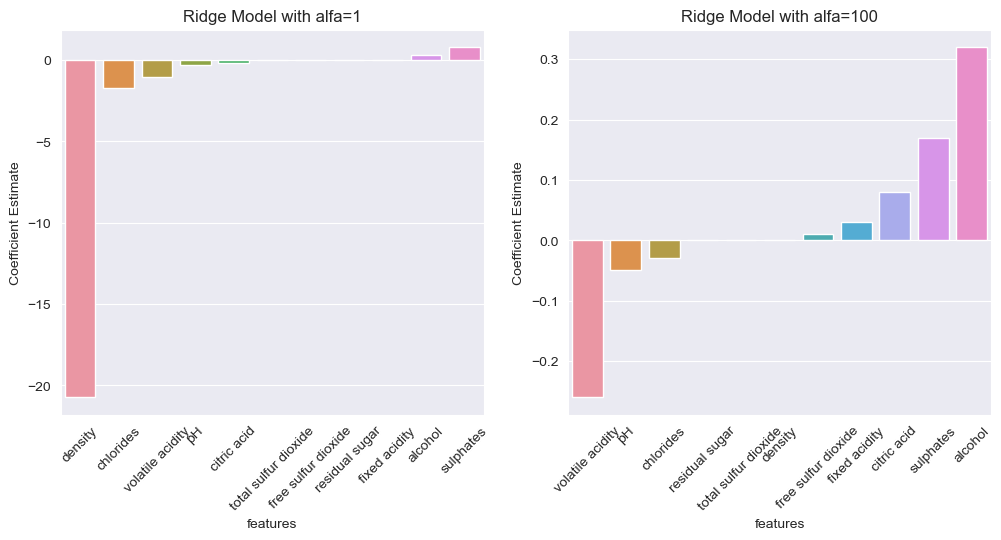

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig_ridge = sns.barplot(coeff_lrg, x=coeff_lrg['features'], y=coeff_lrg['Coefficient Estimate'], ax=axes[0])
fig_ridge.set_xticklabels(fig_ridge.get_xticklabels(), rotation=45)
fig_ridge.set_title('Ridge Model with alfa=1')
fig100 = sns.barplot(coeff_lrg100, x=coeff_lrg100['features'], y=coeff_lrg100['Coefficient Estimate'], ax=axes[1])
fig100.set_xticklabels(fig100.get_xticklabels(), rotation=45)
fig100.set_title('Ridge Model with alfa=100')

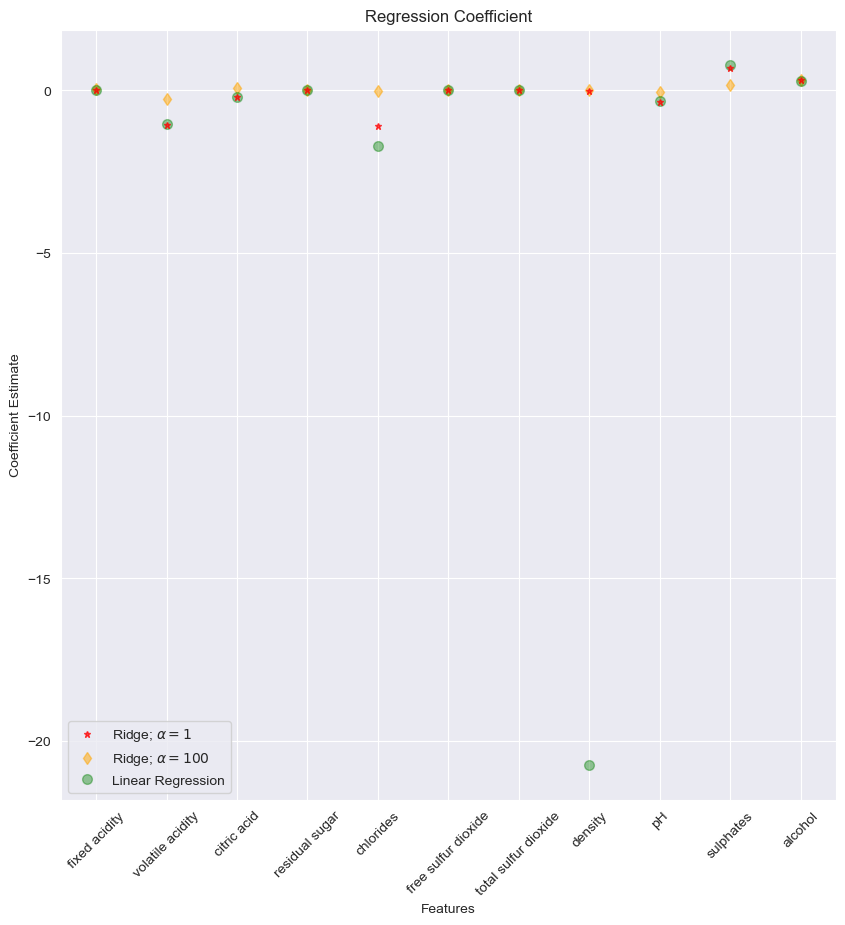

In [20]:
plt.figure(figsize = (10, 10))
plt.plot(X.columns,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 1$',zorder=7)
plt.plot(X.columns,coef_list[-1],alpha=0.5,linestyle='none',marker='d',markersize=6,color='orange',label=r'Ridge; $\alpha = 100$')
plt.plot(X.columns,lnr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.xticks(rotation = 45)
plt.xlabel('Features')
plt.ylabel('Coefficient Estimate')
plt.title('Regression Coefficient')
plt.legend()
plt.show()

### Sequential Feature Selection
This approach is using sequential feature selection to sequentially add or delete features and only use those that improve the model

- `SequentialFeatureSelection` using the `Lasso` to select 4 features.

In [21]:
# Create lasso regression object with an alpha value
lasso_sfs = Lasso(alpha=0.1)

# Create the SequentialFeatureSelector object
sfs = SequentialFeatureSelector(lasso_sfs, n_features_to_select=4)

# Fit the SequentialFeatureSelector
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=Lasso(alpha=0.1), n_features_to_select=4)

In [22]:
# Transform the dataset to only include the selected features
X_train_selected = sfs.transform(X_train)
X_test_selected = sfs.transform(X_test)

# Fit the lasso regression classifier to the training set with the selected features
lasso_sfs.fit(X_train_selected, y_train)
y_pred_lasso_sfs = lasso_sfs.predict(X_test[['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']])
train_mse_lasso_sfs = mean_squared_error(y_train, lasso_sfs.predict(X_train[['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]))
test_mse_lasso_sfs = mean_squared_error(y_test, y_pred_lasso_sfs)
r2_lasso_sfs = r2_score(y_test, y_pred_lasso_sfs)
print(f"Model Train MSE: {train_mse_lasso_sfs:.3f}")
print(f"Model Test MSE: {test_mse_lasso_sfs:.3f}")
print(f"Model R2: {r2_lasso_sfs:.3f}")

# Print which features were selected
selected_features_sfs = sfs.get_support()
print("Selected features:", [X.columns.tolist()[i] for i in range(len(selected_features_sfs)) if selected_features_sfs[i]])

# Evaluate the model on the test set with the selected features
print(f"Model score with selected features: {lasso_sfs.score(X_test_selected, y_test):.3f}")
features_sfs = [X.columns.tolist()[i] for i in range(len(selected_features_sfs)) if selected_features_sfs[i]]
coefs_sfs = lasso_sfs.coef_
df_sfs = pd.DataFrame({'Features':features_sfs, 'Coefficient Estimate':coefs_sfs})
df_sfs

Model Train MSE: 0.484
Model Test MSE: 0.530
Model R2: 0.200
Selected features: ['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']
Model score with selected features: 0.200


Features  Coefficient Estimate
0         fixed acidity              0.010953
1   free sulfur dioxide              0.004705
2  total sulfur dioxide             -0.003798
3               alcohol              0.266510

### Model trained with SequentialFeatureSelection  

In [23]:
X_sfs = df[['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']]
X_train_sfs, X_test_sfs, y_train_sfs, y_test_sfs = train_test_split(X_sfs, y, test_size=0.33, random_state=42)
sfs_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)), ('scaler', StandardScaler()), ('linreg', LinearRegression())])
sfs_pipe.fit(X_train_sfs, y_train_sfs)


Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [24]:
y_pred_sfs = sfs_pipe.predict(X_test_sfs)
train_mse_sfs = mean_squared_error(y_train_sfs, sfs_pipe.predict(X_train_sfs))
test_mse_sfs = mean_squared_error(y_test_sfs, y_pred_sfs)
r2_sfs = r2_score(y_test_sfs, y_pred_sfs)
print(f"Model Train MSE: {train_mse_sfs:.3f}")
print(f"Model Test MSE: {test_mse_sfs:.3f}")
print(f"Model R2: {r2_sfs:.3f}")
coef_sfs = sfs_pipe.named_steps['linreg'].coef_
coeff_sfs_df = pd.DataFrame(['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol'])
coeff_sfs_df['Coefficient Estimate'] = pd.Series(coef_sfs)
coeff_sfs_df.sort_values(by=['Coefficient Estimate'],  inplace=True)
coeff_sfs_df.rename(columns={0:'features'}, inplace=True)
coeff_sfs_df

Model Train MSE: 0.436
Model Test MSE: 0.502
Model R2: 0.242


features  Coefficient Estimate
3               alcohol             -6.772673
0         fixed acidity             -5.763487
1   free sulfur dioxide             -1.379759
2  total sulfur dioxide              4.135170

### Lasso Regression with Regularization

This approach is using a regularized model to identify features based on non-zero coefficients.

- `RFE` using `Lasso` to select 4 features.

In [25]:
# Create lasso regression object with an alpha value
lasso_model_rfe = Lasso(alpha=1)


# Create the RFE object
rfe = RFE(lasso_model_rfe, n_features_to_select=4)

# Fit the SequentialFeatureSelector
rfe.fit(X_train, y_train)



RFE(estimator=Lasso(alpha=1), n_features_to_select=4)

In [26]:

# Transform the dataset to only include the selected features
X_train_selected_rfe = rfe.transform(X_train)
X_test_selected_rfe = rfe.transform(X_test)

# Fit the lasso regression classifier to the training set with the selected features
lasso_model_rfe.fit(X_train_selected_rfe, y_train)

y_pred_lasso_rfe = lasso_model_rfe.predict(X_test[['total sulfur dioxide', 'pH', 'sulphates', 'alcohol']])
train_mse_lasso_rfe = mean_squared_error(y_train, lasso_model_rfe.predict(X_train[['total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]))
test_mse_lasso_rfe = mean_squared_error(y_test, y_pred_lasso_rfe)
r2_lasso_rfe = r2_score(y_test, y_pred_lasso_rfe)
print(f"Model Train MSE: {train_mse_lasso_rfe:.3f}")
print(f"Model Test MSE: {test_mse_lasso_rfe:.3f}")
print(f"Model R2: {r2_lasso_rfe:.3f}")

# Print which features were selected
selected_features_rfe = rfe.get_support()
print("Selected features:", [X.columns.tolist()[i] for i in range(len(selected_features_rfe)) if selected_features_rfe[i]])

# Evaluate the model on the test set with the selected features
print(f"Model score with selected features: {lasso_model_rfe.score(X_test_selected_rfe, y_test):.3f}")
features_rfe = [X.columns.tolist()[i] for i in range(len(selected_features_rfe)) if selected_features_rfe[i]]
coefs_rfe = lasso_model_rfe.coef_
df_rfe = pd.DataFrame({'Features':features_rfe, 'Coefficient Estimate':coefs_rfe})
df_rfe

Model Train MSE: 0.620
Model Test MSE: 0.650
Model R2: 0.019
Selected features: ['total sulfur dioxide', 'pH', 'sulphates', 'alcohol']
Model score with selected features: 0.019


Features  Coefficient Estimate
0  total sulfur dioxide             -0.004042
1                    pH             -0.000000
2             sulphates              0.000000
3               alcohol              0.000000

### Model trained with RFE - Regularization

In [27]:
X_rfe = df[['total sulfur dioxide', 'pH', 'sulphates', 'alcohol']]
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.33, random_state=42)
rfe_pipe = Pipeline([('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)), ('scaler', StandardScaler()), ('linreg', LinearRegression())])
rfe_pipe.fit(X_train_rfe, y_train_rfe)

Pipeline(steps=[('polyfeatures',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('scaler', StandardScaler()), ('linreg', LinearRegression())])

In [28]:
y_pred_rfe = rfe_pipe.predict(X_test_rfe)
train_mse_rfe = mean_squared_error(y_train_rfe, rfe_pipe.predict(X_train_rfe))
test_mse_rfe = mean_squared_error(y_test_rfe, y_pred_rfe)
r2_rfe = r2_score(y_test_rfe, y_pred_rfe)
print(f"Model Train MSE: {train_mse_rfe:.3f}")
print(f"Model Test MSE: {test_mse_rfe:.3f}")
print(f"Model R2: {r2_rfe:.3f}")
coef_rfe = rfe_pipe.named_steps['linreg'].coef_
coeff_rfe_df = pd.DataFrame(['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol'])
coeff_rfe_df['Coefficient Estimate'] = pd.Series(coef_rfe)
coeff_rfe_df.sort_values(by=['Coefficient Estimate'],  inplace=True)
coeff_rfe_df.rename(columns={0:'features'}, inplace=True)
coeff_rfe_df

Model Train MSE: 0.386
Model Test MSE: 0.412
Model R2: 0.378


features  Coefficient Estimate
0         fixed acidity             -8.126635
3               alcohol             -5.848333
1   free sulfur dioxide             11.742947
2  total sulfur dioxide             15.955144

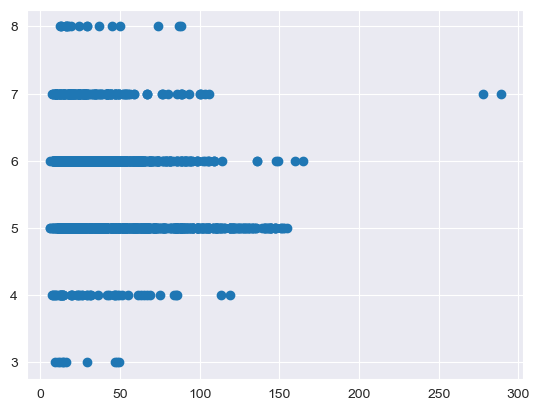

In [29]:
plt.scatter(X['total sulfur dioxide'], y)

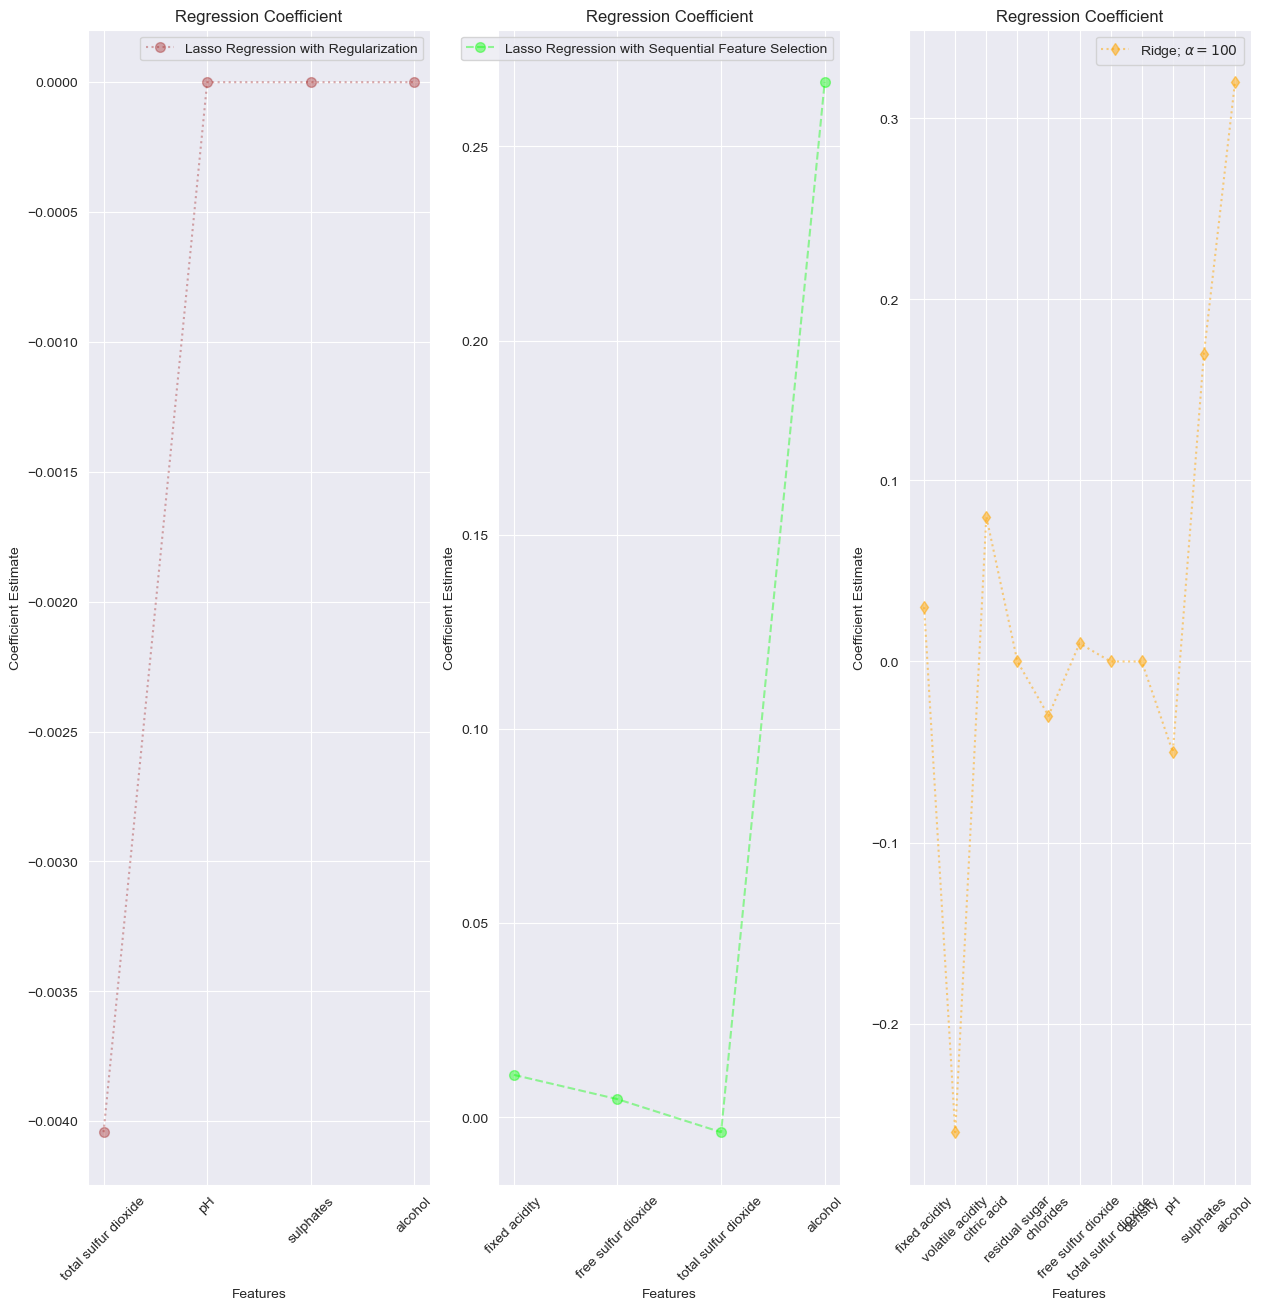

In [30]:
plt.figure(figsize = (15, 15))
#plt.plot(X.columns,ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 1$',zorder=7)
#plt.plot(X.columns,coef_list[-1],alpha=0.5,linestyle='none',marker='d',markersize=6,color='orange',label=r'Ridge; $\alpha = 100$')
#plt.plot(X.columns,lnr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')
plt.subplot(1,3,1)
plt.plot(X[['total sulfur dioxide', 'pH', 'sulphates', 'alcohol']].columns,lasso_model_rfe.coef_,alpha=0.4,linestyle='dotted',marker='o',markersize=7,color='brown',label='Lasso Regression with Regularization')
plt.xticks(rotation = 45)
plt.xlabel('Features')
plt.ylabel('Coefficient Estimate')
plt.title('Regression Coefficient')
plt.legend()

plt.subplot(1,3,2)
plt.plot(X[['fixed acidity', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']].columns,lasso_sfs.coef_,alpha=0.4,linestyle='dashed',marker='o',markersize=7,color='lime',label='Lasso Regression with Sequential Feature Selection')
plt.xticks(rotation = 45)
plt.xlabel('Features')
plt.ylabel('Coefficient Estimate')
plt.title('Regression Coefficient')
plt.legend()

plt.subplot(1,3,3)
plt.plot(X.columns,coef_list[-1],alpha=0.5,linestyle='dotted',marker='d',markersize=6,color='orange',label=r'Ridge; $\alpha = 100$')
plt.xticks(rotation = 45)
plt.xlabel('Features')
plt.ylabel('Coefficient Estimate')
plt.title('Regression Coefficient')
plt.legend()
plt.show()

plt.show()

Text(0.5, 1.0, 'Lasso Regression with Sequential Feature Selection')

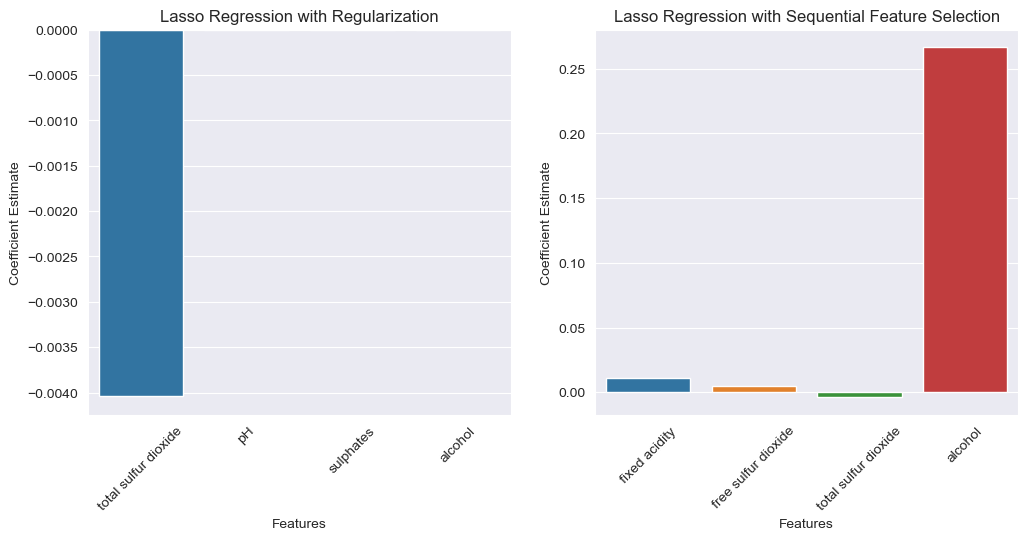

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
fig_ridge = sns.barplot(df_rfe, x=df_rfe['Features'], y=df_rfe['Coefficient Estimate'], ax=axes[0])
fig_ridge.set_xticklabels(fig_ridge.get_xticklabels(), rotation=45)
fig_ridge.set_title('Lasso Regression with Regularization')
fig100 = sns.barplot(df_sfs, x=df_sfs['Features'], y=df_sfs['Coefficient Estimate'], ax=axes[1])
fig100.set_xticklabels(fig100.get_xticklabels(), rotation=45)
fig100.set_title('Lasso Regression with Sequential Feature Selection')

In [32]:
reg_models = {'MSE':[0.4242, 0.4266, 0.4771, 0.53, 0.65],
              'R2':[0.359, 0.356, 0.28, 0.2, 0.019]
              }
models =['Linear', 'Ridge_alha_1', 'Ridge_alha_100', 'Lasso_SequentialFeatureSelector', 'Lasso_RFE']
models_df = pd.DataFrame(data=reg_models, index=models)
models_df

MSE     R2
Linear                           0.4242  0.359
Ridge_alha_1                     0.4266  0.356
Ridge_alha_100                   0.4771  0.280
Lasso_SequentialFeatureSelector  0.5300  0.200
Lasso_RFE                        0.6500  0.019

<Axes: >

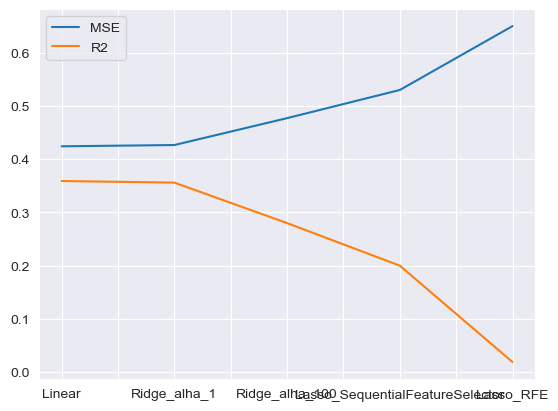

In [33]:
models_df.plot()

In [34]:
models_df

MSE     R2
Linear                           0.4242  0.359
Ridge_alha_1                     0.4266  0.356
Ridge_alha_100                   0.4771  0.280
Lasso_SequentialFeatureSelector  0.5300  0.200
Lasso_RFE                        0.6500  0.019

In [35]:
create_table(models_df, index=True, index_title='Regression Model')

In [36]:
df_models = models_df.reset_index()
df_models.rename(columns={'index':'model'}, inplace=True)
fig=px.bar(df_models, x="R2", y='model', color='MSE' ,barmode = 'stack', labels={'model':'Model','cv_score':'Scores', 'mse_score':'MSE'}, title='Regression Models Metrics Comparison')
fig.show()

In [37]:
models_df.reset_index()

index     MSE     R2
0                           Linear  0.4242  0.359
1                     Ridge_alha_1  0.4266  0.356
2                   Ridge_alha_100  0.4771  0.280
3  Lasso_SequentialFeatureSelector  0.5300  0.200
4                        Lasso_RFE  0.6500  0.019